<a href="https://colab.research.google.com/github/AnaBelenCarbajal/DataVisualizaton/blob/main/Dataset_Human_Category_Learning_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset novel shapes**

1) Installing packages

In [1]:
!pip install osculari

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nv

In [2]:
#packages
import osculari

import os
import pandas as pd
import torch
import numpy as np
from matplotlib import pyplot as plt

from random import choice, randint, seed
import torchvision.transforms.functional as transform
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms import v2
from torchvision.transforms import Pad
from torch.utils.data import DataLoader

from PIL import Image

In [3]:
# unzip folder (previously uploaded in collab)
!unzip CategoryLearningStimuli.zip -d my_data

Archive:  CategoryLearningStimuli.zip
   creating: my_data/Stimuli_Set1/
  inflating: my_data/__MACOSX/._Stimuli_Set1  
  inflating: my_data/Stimuli_Set1/63.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._63.jpg  
  inflating: my_data/Stimuli_Set1/189.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._189.jpg  
  inflating: my_data/Stimuli_Set1/77.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._77.jpg  
  inflating: my_data/Stimuli_Set1/162.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._162.jpg  
  inflating: my_data/Stimuli_Set1/176.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._176.jpg  
  inflating: my_data/Stimuli_Set1/88.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._88.jpg  
  inflating: my_data/Stimuli_Set1/348.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._348.jpg  
  inflating: my_data/Stimuli_Set1/360.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._360.jpg  
  inflating: my_data/Stimuli_Set1/228.jpg  
  inflating: my_data/__MACOSX/Stimuli_Set1/._228.j

In [4]:
# root directory to data
root = "my_data/Stimuli_Set1/"

In [5]:
# get category labels
image_ID = os.listdir(root)

#remove ".DS_Store"
image_ID.remove(".DS_Store")
#image_ID.remove(".ipynb_checkpoints")

2) Defining parameters

In [6]:
# conditions
condition1 = {
    'A':[-30, 30],  #low var
    'D':[-80, 80]   #high var
    }

condition2 = {
    'A':[-80, 80], #high var
    'D':[-30, 30]  #low var
    }

In [7]:
# reference shapes angles --> categories
reference_shapeA = 0
reference_shapeB = 310
reference_shapeC = 260
reference_shapeD = 210

reference_shapes_list = [reference_shapeA, reference_shapeB, reference_shapeC, reference_shapeD]

3) Get angles and directory

In [8]:
# get angles
angles = []
for image in image_ID:
  get_angle = image.replace('.jpg', '')
  transform_to_int = int(get_angle)
  angles.append(transform_to_int)

In [9]:
# get image directories
img_dir = []

for image in image_ID:
  folder_path = root + image
  img_dir.append(folder_path)

4) Create general dataset

In [10]:
data =  {'angle' : angles,
         'image' : image_ID,
         'img_dir' : img_dir}
# df
df_data = pd.DataFrame(data)
df_data = df_data.sort_values('angle')

In [11]:
# Create dictionary data
def CreateDictionary (dataframe):
  data_dicts = []

  for i in range(len(dataframe)):
    angle = dataframe.iloc[i, 0]
    image = dataframe.iloc[i, 1]
    img_dir = dataframe.iloc[i, 2]

    individual_dic =  {'angle' : angle,
                       'image' : image,
                       'img_dir' : img_dir}

    data_dicts.append(individual_dic)
  return data_dicts

In [12]:
data_dict = CreateDictionary(df_data)
data_dict[0]

{'angle': 0, 'image': '0.jpg', 'img_dir': 'my_data/Stimuli_Set1/0.jpg'}

In [44]:
type(data_dict[0]['angle'])

numpy.int64

Download positions for nn

In [13]:
# read positions.txt
#read
positions = np.loadtxt("positions.txt")
positions = positions.tolist()
positions = [[int(float(j)) for j in i] for i in positions]
positions[:5]

[[23, 25, 21, 19],
 [26, 26, 18, 18],
 [31, 7, 13, 37],
 [27, 5, 17, 39],
 [31, 10, 13, 34]]

5) Define functions to create dataset for EACH REFERENCE SHAPE

identical angle = same category

other angle = different category

8) Define class for CNN

In [53]:
class ShapeImageDataset (Dataset):
  # return two images, with 50% chance in same or different category and ground truth

  # __init__
  def __init__(self, length, reference_shape, test_shape, data_dict, positions, transform=None):
    self.length = length
    self.reference_shape = reference_shape
    self.test_shape = int(test_shape)
    self.data = data_dict
    self.transform = transform
    self.positions = positions

  # __len__
  def __len__(self):
    return self.length

  ### funtions for __getitem__ ###

#get label of reference shape (the right column in dataset)

  # function to read images
  def read_image_from_directory(self, img_dir):
    return read_image(img_dir, ImageReadMode.RGB)

  # __getitem__
  def __getitem__(self, idx):

    # img1 should be reference shape
    ref_shape_image = self.data[self.reference_shape]
    ref_shape_angle = ref_shape_image['angle']
    ref_shape_dir = ref_shape_image['img_dir']

    # img2 should be test shape: from all angles
    test_shape_image = self.data[self.test_shape]
    test_shape_angle = test_shape_image['angle']
    test_shape_dir = test_shape_image['img_dir']

    # gt
    if ref_shape_angle == test_shape_angle:
      gt = 1
    else:
      gt = 0

    # read images
    img1 = self.read_image_from_directory(ref_shape_dir)
    img2 = self.read_image_from_directory(test_shape_dir)

    # apply transformations 1
    if self.transform:
      img1 = self.transform(img1)
      img2 = self.transform(img2)

    # apply transformation of position to image
    img1_selected_position = choice(self.positions)
    img2_selected_position = choice(self.positions)

    padding_img1 = Pad(padding = img1_selected_position)
    padding_img2 = Pad(padding = img2_selected_position)

    img1 = padding_img1(img1)
    img2 = padding_img2(img2)

    return img1, img2, gt

9) Create datasets of images

In [15]:
# tranformations to images for NN
preprocess = v2.Compose(
    [   v2.ToDtype(torch.float32, scale=True),
        v2.Resize([180,180]),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [59]:
#create dataset dfor RSA
#parameters: length, reference_shape, test_shape, data_dict, positions, transform=None)
len_dataset = 1000
test_shape = 90
dataset_RSA = ShapeImageDataset(len_dataset, reference_shapeA, test_shape, data_dict, positions, preprocess)

In [24]:
len(dataset_RSA)

1000

**Plotting Dataset**

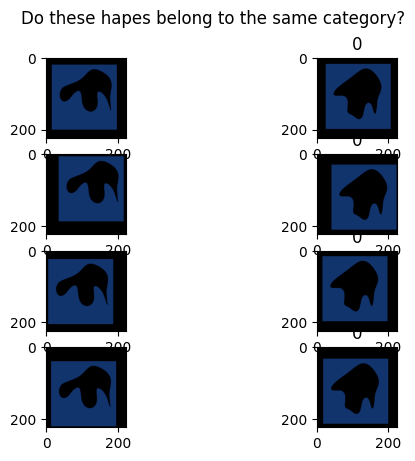

In [51]:
no_randoms = [0, 200, 500, 800]

fig, ax = plt.subplots(4, 2)
fig.suptitle("Do these hapes belong to the same category?")

for idx, number in enumerate(no_randoms):
  pairs = dataset_RSA[number]
  img1 = pairs[0]
  img2 = pairs[1]
  gt = pairs[2]

  ax[idx][0].imshow(img1.permute(1, 2, 0))
  # print size cmap: grey (to convert black and white)

  title = str(gt)
  ax[idx][1].set_title(title)
  ax[idx][1].imshow(img2)

**Neural network**

Get pre-trained weights

In [25]:
#load pretrained weights
model = 'weights.pt'
pretrained_weights = torch.load(model)

In [26]:
#network
architecture = 'resnet50'        # network's architecture
weights = 'resnet50'             # the pretrained weights
img_size = 180                   # network's input size
layer = 'block4'                 # the readout layer
pooling = None
readout_kwargs = {               # parameters for extracting features from the pretrained network
    'architecture': architecture,
    'weights': weights,
    'layers': layer,
    'img_size': img_size,
    'pooling': pooling
}
pretrained_model = osculari.models.paradigm_2afc_merge_concatenate(**readout_kwargs)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 128MB/s]


In [27]:
pretrained_model.load_state_dict(pretrained_weights)

<All keys matched successfully>

Staircase

In [66]:
# test function
"""
            test_fun: Function for evaluating the model. This function must accept three
             positional arguments (i.e., model, db_loader, device). The output of this function
             should be a dictionary containing the key `accuracy`.
"""
epoch_fun = osculari.paradigms.forced_choice.epoch_loop

test_fun = lambda model, db_loader, device: osculari.paradigms.paradigm_utils.train_linear_probe(
        model, db_loader, epoch_fun, 'my_data/osculari_test/', device, epochs = 10)

In [56]:
# dataset function
"""
            dataset_fun: Function for creating the dataset and dataloader. This function must
             accept one argument (mid_val, i.e., the current value to be tested). This funtion must
             return a tuple of three elements (i.e., dataset, batch_size, threshold).
"""

#parameters: length, reference_shape, test_shape, data_dict, positions, transform=None)
def dataset_fun (len_dataset, reference_shape, test_shape, data_dict, positions, preprocess):
    test_dataset = ShapeImageDataset(len_dataset, test_shape, reference_shape, data_dict, positions, preprocess)
    return test_dataset, 64, 0.749

db_fun = lambda test_shape: dataset_fun(len_dataset, test_shape, reference_shapeA, data_dict, positions, preprocess)

In [67]:
test_log = osculari.paradigms.staircase(pretrained_model, test_fun, db_fun, low_val=0, high_val=180)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x200704 and 147456x2)